# Exploration Matrice du commerce traduite en fraçais
https://www.fao.org/faostat/fr/#data/TM


In [127]:
%load_ext autoreload
%autoreload 2 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import utils.iodf as iodf
import utils.exchange_plots as xplt
import utils.crops as crops


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Structure

- Code Domaine
- Domaine  
- Code pays déclarant (FAO)
- Pays déclarants 
- Code pays partenaire (FAO)  
- Pays partenaires
- Code Élément
  - 'Importations - Quantité'
  - 'Importations - Valeur'
  - 'Exportation - Quantité'
  - 'Exportation - Valeur'
- Élément
- Code Produit (FAO) 
- Produit  
- Code année  
- Année 
- Unité 
- Valeur
- Symbole  
- Description du Symbole


## Traduction des codes pays
Les données de carto comportent les codes pays en iso_a3 et les données un code pays FAO
fichier excel de correspondance ici https://www.fao.org/nocs/en
- le fichier codespays_fao_isoa3.csv sert pour la correspondance

In [49]:
code_pays_df = pd.read_csv('codespays_fao_isoa3.csv')
code_pays_df = code_pays_df[['ISO3', 'FAOSTAT', 'LIST NAME']].dropna()
code_pays_df['FAOSTAT'] = code_pays_df['FAOSTAT'].astype(int)
code_pays_df.head(2)

,ISO3,FAOSTAT,LIST NAME
0,AFG,2,Afghanistan
2,ALB,3,Albania


## Donnée entre la espagne et l'italie
le reste est a scrapper

In [160]:
## Lit tous les CSV de matrices qui doivent commencer par FAOSTAT
matrice_df = iodf.concatenate_csv('FAOSTAT*.csv')

## Ajoute les codes ISO au df pour les pays partenaire et déclarant
matrice_df = pd.merge(matrice_df, code_pays_df, left_on='Code pays déclarant (FAO)', right_on='FAOSTAT')
matrice_df = pd.merge(matrice_df, code_pays_df, left_on='Code pays partenaire (FAO)', right_on='FAOSTAT', suffixes=(None, '_partenaire'))

## Clean le nom des colonnes, certaines peuvent disparaitre car en doublon
matrice_df.rename(
    columns = {
        'ISO3': 'Code pays déclarant (ISO)',
        'ISO3_partenaire': 'Code pays partenaire (ISO)',
        'LIST NAME': 'Pays déclarants (ISO)',
        'LIST NAME_partenaire': 'Pays partenaire (ISO)',
        'FAOSTAT' : 'Code ISO declarant',
        'FAOSTAT_partenaire' : 'Code ISO partenaire',
    },
    inplace=True
)

In [48]:
matrice_df.head(2)

,Code Domaine,Domaine,Code pays déclarant (FAO),Pays déclarants,Code pays partenaire (FAO),Pays partenaires,Code Élément,Élément,Code Produit (FAO),Produit,...,Unité,Valeur,Symbole,Description du Symbole,Code pays déclarant (ISO),Code ISO declarant,Pays déclarants (ISO),Code pays partenaire (ISO),Code ISO partenaire,Pays partenaire (ISO)
0,TM,Matrices du commerce détaillées,68,France,203,Espagne,5610,Importations - Quantité,809,"Abaca, chanvre de manille",...,NaN,NaN,NaN,NaN,FRA,68,France,ESP,203,Spain
1,TM,Matrices du commerce détaillées,68,France,203,Espagne,5610,Importations - Quantité,809,"Abaca, chanvre de manille",...,NaN,NaN,NaN,NaN,FRA,68,France,ESP,203,Spain


In [162]:
ressource_code = [515]
from_country_iso = 'ITA'
to_country_iso = 'FRA'
year = [2000]
query = f"`Code Produit (FAO)` in {ressource_code} & `Code pays déclarant (ISO)` == '{from_country_iso}' & `Code pays partenaire (ISO)` == '{to_country_iso}' & `Année` in {year}"
matrice_df.query(query)


,Code Domaine,Domaine,Code pays déclarant (FAO),Pays déclarants,Code pays partenaire (FAO),Pays partenaires,Code Élément,Élément,Code Produit (FAO),Produit,...,?l?ment,Code ann?e,Ann?e,Unit?,Code pays déclarant (ISO),Code ISO declarant,Pays déclarants (ISO),Code pays partenaire (ISO),Code ISO partenaire,Pays partenaire (ISO)



`Code Produit (FAO)` == 544 & `Pays déclarants (ISO)` == 'Italy' & `Pays partenaire (ISO)` == 'Spain' & `Année` == 2001


/home/mdm/code/DiMartinoMathieu/Project-Agri/datasets/utils/exchange_plots.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  from_country_center = from_country.centroid
/home/mdm/code/DiMartinoMathieu/Project-Agri/datasets/utils/exchange_plots.py:39: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  to_country_center = to_country.centroid


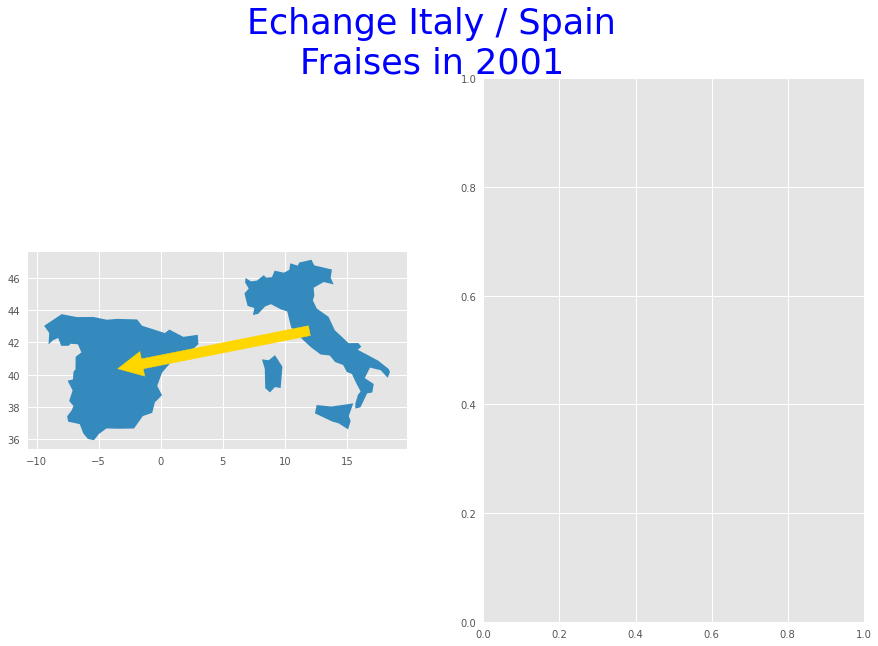

In [35]:
xplt.explot_country_ressource_year(
    df = matrice_df,
    from_country_name='Italy',
    to_country_name='Spain',
    ressource_code=544,
    year=2001
)

## Plot de l'évolution des échanges entre pays

In [158]:
ressource_code = [515]
from_country_iso = 'ITA'
to_country_iso = ['ESP', 'FRA']
years = list(np.arange(2000,2020,1, dtype='int'))
query = f"`Code Produit (FAO)` in {ressource_code} & `Code pays déclarant (ISO)` == '{from_country_iso}' & `Code pays partenaire (ISO)` in @to_country_iso & `Année` in {year}"
esp_ita_2000 = matrice_df.query(query)

In [157]:
esp_ita_2000.to_csv('test.csv')

In [153]:
esp_ita_2000_2001_import_qte = esp_ita_2000[esp_ita_2000['Élément'] == 'Importations - Quantité']
esp_ita_2000_2001_export_qte = esp_ita_2000[esp_ita_2000['Élément'] == 'Exportations - Quantité']

In [154]:
esp_ita_2000_2001_import_qte['Produit'].unique()[0]

'Pommes'

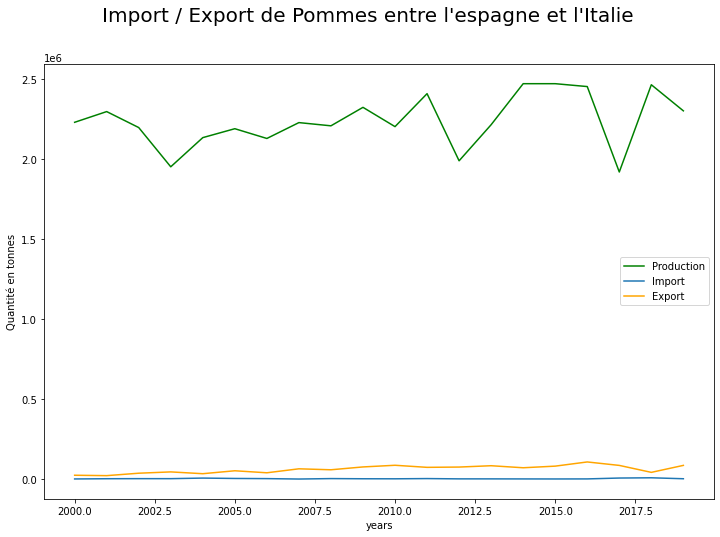

In [155]:
plot_product_name = esp_ita_2000_2001_import_qte['Produit'].unique()[0]
plot_unit = esp_ita_2000_2001_import_qte['Unité'].unique()[0]

production = crops.query_production(106, 515, years, 'Production')

plt.figure(figsize=(12,8))

sns.lineplot(
    data = production,
    x = 'years',
    y = 'production',
    color='green',
    label='Production',
)


sns.lineplot(
    data = esp_ita_2000_2001_import_qte,
    x = 'Année',
    y = 'Valeur',
    label='Import',
)

sns.lineplot(
    data = esp_ita_2000_2001_export_qte,
    x = 'Année',
    y = 'Valeur',
    color='orange',
    label='Export',
)

plt.ylabel(f'Quantité en {plot_unit}')

plt.suptitle(
    f'Import / Export de {plot_product_name} entre l\'espagne et l\'Italie',
    fontsize=20
);


In [148]:
production

,years,production
0,2000,2232100.0
1,2001,2299100.0
2,2002,2199219.0
3,2003,1953752.0
4,2004,2136226.0
5,2005,2192000.0
6,2006,2130980.0
7,2007,2230191.0
8,2008,2210100.0
9,2009,2325653.0
